<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles
import torch
from sklearn.model_selection import train_test_split
from torch import nn


In [2]:
n=1000

x,y= make_circles(n,noise=0.03, random_state=42)

In [3]:
len(x), len(y)

(1000, 1000)

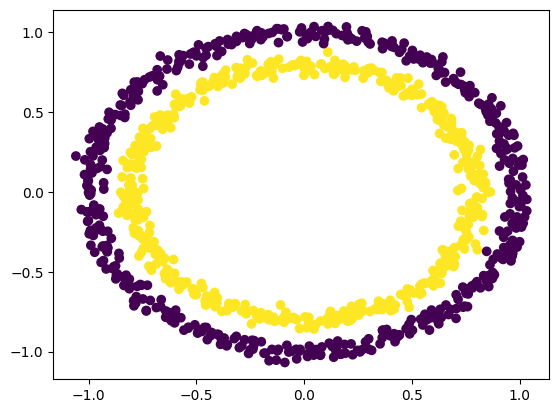

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
import pandas as pd
df=pd.DataFrame({
    "x1":x[:,0],
    "x2":x[:,1],
    "y":y
})
df.head()

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
torch.__version__

'2.8.0+cu126'

In [9]:
type(x), x.dtype

(numpy.ndarray, dtype('float64'))

In [10]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [11]:
type(x), x.dtype

(torch.Tensor, torch.float32)

In [12]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2, random_state=42 )

In [13]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
class CM(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.layer2(self.layer1(x))

In [15]:
model=CM().to(device)


In [16]:
model2=nn.Sequential(
    nn.Linear(in_features=2,out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128,out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256,out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128,out_features=1),
).to(device)

In [17]:
model2

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=1, bias=True)
)

In [18]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.0682,  0.4492],
                      [-0.0182,  0.1385],
                      [ 0.2371, -0.2491],
                      [ 0.5456,  0.6578],
                      [ 0.5595,  0.5935]])),
             ('layer1.bias',
              tensor([-0.2268, -0.1595, -0.0071, -0.6018, -0.1425])),
             ('layer2.weight',
              tensor([[ 0.3296,  0.2452, -0.0930,  0.1342, -0.3477]])),
             ('layer2.bias', tensor([-0.3041]))])

In [19]:
model2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6607, -0.2141],
                      [ 0.5753,  0.4277],
                      [ 0.1233,  0.0831],
                      [ 0.3462,  0.2490],
                      [ 0.5454, -0.5725],
                      [ 0.6623, -0.1226],
                      [-0.3313,  0.2827],
                      [ 0.4630,  0.3149],
                      [ 0.0463, -0.4383],
                      [-0.7042,  0.2483],
                      [ 0.6749, -0.4645],
                      [ 0.4435,  0.0958],
                      [-0.3335, -0.3105],
                      [ 0.6862,  0.6546],
                      [ 0.5223, -0.3120],
                      [ 0.1387, -0.4378],
                      [-0.2020, -0.2175],
                      [-0.0036,  0.0678],
                      [-0.2955,  0.2585],
                      [-0.6606, -0.5427],
                      [-0.1959,  0.0719],
                      [-0.0385,  0.2912],
                      [ 0.4822,  0.2851],
        

In [20]:
lossfn=nn.BCEWithLogitsLoss()
opt=torch.optim.Adam(params=model2.parameters(),lr=0.01)

In [21]:
def accuracy(ytrue,ypred):
  correct=torch.eq(ytrue, ypred).sum().item()
  acc= (correct/len(ypred)) * 100
  return acc

In [22]:
torch.manual_seed(42)
epochs=1000

xtrain, ytrain= xtrain.to(device), ytrain.to(device)
xtest, ytest= xtest.to(device), ytest.to(device)


In [23]:
for i in range(epochs):
  model.train()
  ylogits= model(xtrain).squeeze()
  ypred=torch.round(torch.sigmoid(ylogits))

  loss= lossfn(ylogits, ytrain)
  acc=accuracy(ytrain,ypred)

  opt.zero_grad()

  loss.backward()

  opt.step()


  model.eval()
  with torch.inference_mode():
    testlogits= model(xtest).squeeze()
    testpred= torch.round(torch.sigmoid(testlogits))

    testloss=lossfn(testlogits, ytest)
    testacc=accuracy(ytest,testpred)

  if i%100==0:
    print(f"epoch: {i}  | loss: {loss}      | accuracy: {acc}       | testloss: {testloss}       | testacc: {testacc}")

epoch: 0  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 100  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 200  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 300  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 400  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 500  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 600  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 700  | loss: 0.7192031145095825      | accuracy: 50.0       | testloss: 0.7191081047058105       | testacc: 50.0
epoch: 800  | loss: 0.7192031145095825    

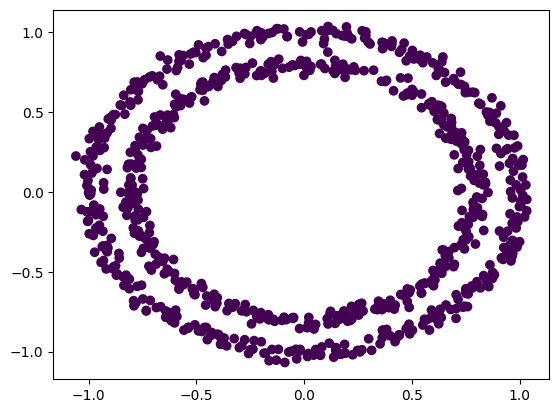

In [24]:
import matplotlib.pyplot as plt
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ypred.detach().numpy())
plt.show()

In [25]:
for i in range(epochs):
  model2.train()
  ylogits= model2(xtrain).squeeze()
  ypred=torch.round(torch.sigmoid(ylogits))

  loss= lossfn(ylogits, ytrain)
  acc=accuracy(ytrain,ypred)

  opt.zero_grad()

  loss.backward()

  opt.step()


  model2.eval()
  with torch.inference_mode():
    testlogits= model2(xtest).squeeze()
    testpred= torch.round(torch.sigmoid(testlogits))

    testloss=lossfn(testlogits, ytest)
    testacc=accuracy(ytest,testpred)

  if i%100==0:
    print(f"epoch: {i}  | loss: {loss}      | accuracy: {acc}       | testloss: {testloss}       | testacc: {testacc}")

epoch: 0  | loss: 0.6914716362953186      | accuracy: 52.37500000000001       | testloss: 0.7550480365753174       | testacc: 50.0
epoch: 100  | loss: 0.00026345709920860827      | accuracy: 100.0       | testloss: 0.0019409854430705309       | testacc: 100.0
epoch: 200  | loss: 0.0001370927202515304      | accuracy: 100.0       | testloss: 0.0014078791718930006       | testacc: 100.0
epoch: 300  | loss: 8.207194332499057e-05      | accuracy: 100.0       | testloss: 0.0010162107646465302       | testacc: 100.0
epoch: 400  | loss: 5.108592449687421e-05      | accuracy: 100.0       | testloss: 0.0007791392272338271       | testacc: 100.0
epoch: 500  | loss: 3.521634789649397e-05      | accuracy: 100.0       | testloss: 0.0005962643772363663       | testacc: 100.0
epoch: 600  | loss: 2.606435737106949e-05      | accuracy: 100.0       | testloss: 0.0004972934257239103       | testacc: 100.0
epoch: 700  | loss: 2.0081910406588577e-05      | accuracy: 100.0       | testloss: 0.00042499226401

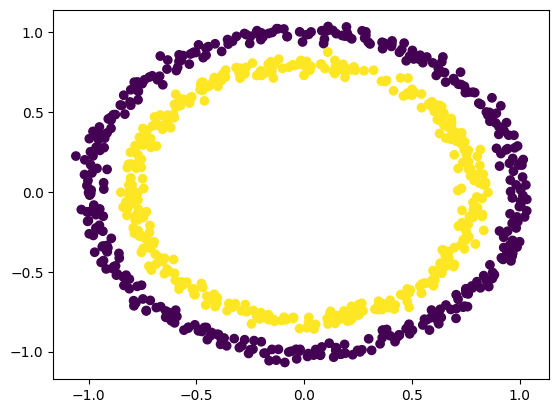

In [26]:
import matplotlib.pyplot as plt
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ypred.detach().numpy())
plt.show()